In [1]:
import pandas as pd
import os
import glob
import json

In [2]:
df = pd.read_csv('positive.csv').drop(columns=['Unnamed: 0'])
df

,ht_id,cat_id_1,cat_id_2,cat_id_3,cat_id_4,cat_id_5,cat_id_6,cat_id_7,cat_id_8,cat_id_9,...,cat_id_27,cat_id_28,cat_id_29,cat_id_30,cat_id_31,cat_id_32,cat_id_33,cat_id_34,cat_id_35,cat_id_36
0,1,96.55,93.75,71.43,0,100.0(부족),63.64,0.0(부족),0,16.67,...,100.0(부족),14.29,0,0,0,100.0(부족),20,0,0,0
1,2,90.38,90.14,100.0,0.0(부족),66.67(부족),68.0,0,100.0(부족),0.0(부족),...,0.0,30.0,0,0,0,88.24,33.33(부족),0,0,0
2,3,25.0(부족),88.89,66.67,0,100.0(부족),70.0,0.0(부족),0,33.33(부족),...,0,50.0(부족),0,0,0,33.33(부족),33.33(부족),0,100.0(부족),0
3,4,94.23,97.0,88.89,0.0(부족),66.67(부족),79.41,100.0,0,57.14,...,50.0(부족),9.09,0,0,0,0.0(부족),77.78,0,0,0
4,5,92.0,92.75,76.92,0.0(부족),100.0(부족),83.33,33.33(부족),0,28.57,...,0,57.14,0,0,0,71.43,50.0(부족),0,66.67(부족),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,382,100.0,80.0,50.0(부족),0,0,100.0,0,0,100.0(부족),...,0.0(부족),0.0(부족),0,0,0,0,50.0(부족),0,0,0
382,383,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,384,100.0(부족),91.3,87.5,0,0,100.0,0,0,50.0(부족),...,100.0(부족),50.0(부족),0,0,0,0,0,0,0,0
384,385,75.0,50.0(부족),0.0(부족),0,0,50.0,0,0,0,...,0.0(부족),100.0(부족),0,0,0,0,75.0,0,0,0


In [19]:
df.to_csv('../web/score.csv',index=False)

In [3]:
lst = list(df.columns[1:])
for i,z in enumerate(lst):
    lst[i] = z.split('id_')[1]
    

In [4]:
for i in df.columns[1:]:
    df.rename(columns={i:i.split('id_')[1]},inplace=True)

In [38]:
test = df[['1','2']]
# test['1_'] = test['1'].str.split('(').str[0].astype(float)
# test['2_'] = test['2'].str.split('(').str[0].astype(float)
# test['sum'] = (test.loc[:,'1_'] + test.loc[:,'2_'])/2
for i in range(test.shape[0]):
    if '(부족)' in test.iloc[i,0] :
        test.iloc[i,0] = 0
    if '(부족)' in test.iloc[i,1] :
        test.iloc[i,1] = 0
test

C:\Users\user\AppData\Local\Temp\ipykernel_14788\103978908.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.iloc[i,0] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_14788\103978908.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.iloc[i,1] = 0


,1,2
0,96.55,93.75
1,90.38,90.14
2,0,88.89
3,94.23,97.0
4,92.0,92.75
...,...,...
381,100.0,80.0
382,0,0
383,0,91.3
384,75.0,0


In [12]:
test[test['1'].str.contains('25.')]

,1,2,1_,2_
2,25.0(부족),88.89,25.0(),88.89


In [16]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [19]:
display_html(df[['ht_id','12','15']],df[['ht_id','12','15']].sort_values(by=['12','15'],ascending=False))

,ht_id,12,15
0,1,100.0(부족),90.48
1,2,0,91.03
2,3,66.67,100.0
3,4,0,88.68
4,5,100.0(부족),95.24
...,...,...,...
381,382,0,0.0(부족)
382,383,0,0
383,384,0,66.67(부족)
384,385,0,50.0(부족)


,ht_id,12,15
99,100,90.32,88.89
71,72,89.96,80.14
40,41,88.24,88.68
219,220,88.0,87.8
235,236,85.37,82.64
...,...,...,...
381,382,0,0.0(부족)
72,73,0,0
278,279,0,0
377,378,0,0


In [59]:
import os
import pandas as pd
import pymysql as m

In [60]:
lst = os.listdir('./labeling/')
len(lst)

36

In [83]:
df = pd.DataFrame()
for file in lst : 
    dt = pd.read_csv(f'./labeling/{file}')
    df = pd.concat([df,dt])
    
df.sort_values(by=['cat_id','ht_id','date'],inplace=True)
df.reset_index(drop=True, inplace=True)
    

In [88]:
# con = m.connect(host='localhost', user='root',
#                 db = 'rnr',password='1234',charset='utf8')
# cur = con.cursor()


# rev_id = list(range(1,df.shape[0]+1))
# ht_id = df['ht_id']
# cat_id= df['cat_id']
# date = df['date']
# review = df['review']
# label = df['label']
# for ri,i,c,d,r,l in zip(rev_id,ht_id,cat_id,date,review,label):
#     sql = '''insert into rev_list values (%s,%s,%s,%s,%s,%s);'''
#     cur.execute(sql,(ri,i, c,d,r,l))
#     con.commit()

# con.close()

# 발표준비

In [120]:
import pandas as pd
import numpy as np
import glob

from matplotlib import font_manager, rc #한글이 나오"게
from math import sqrt
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [121]:
file_list = glob.glob('./labeling/*.csv')

df_list = []
for file in file_list:
    df = pd.read_csv(file)
    df_list.append(df.shape[0])
    # df_list.append(df)

# df_concat = pd.concat(df_list, axis=0)

In [3]:
sum(df_list)/len(df_list)

14428.444444444445

In [8]:
file_list

['./datas\\10_청결.csv',
 './datas\\11_친절.csv',
 './datas\\1_가성비.csv',
 './datas\\2_방음.csv',
 './datas\\3_비품.csv',
 './datas\\4_시설.csv',
 './datas\\5_위치.csv',
 './datas\\6_재방문.csv',
 './datas\\7_조식.csv',
 './datas\\8_주변시설.csv',
 './datas\\9_주차.csv']

In [122]:
file_list = glob.glob('./datas/*.csv')

df_list2 = []
df_list =[]
for file in file_list:
    if '6' in file:
        continue
    df = pd.read_csv(file)
    df_list.append(df)
    df_list2.append(df.shape[0])

df_concat = pd.concat(df_list, axis=0)
df = df_concat[df_concat['cat_id']!=11]
df.reset_index(drop=True,inplace=True)

In [12]:
sum(df_list2)/len(df_list2)

37706.1

In [6]:
df_concat

,ht_id,cat_id,date,star,review,label
0,1,3,2019-02-27,10.0,직원분의 친절한 설명과 룸 청결상태와 침구 상태가 좋아서 낯선 곳의 하룻밤이 즐겁네요,1
1,1,3,2019-02-27,10.0,여긴 바닥 먼지가 조금 있었던걸 제외하곤 다 좋았어요,2
2,1,3,2020-02-27,10.0,위치 너무 좋고 깨끗합니다,1
3,1,3,2020-02-27,10.0,위치 소음 청결 다 좋았지만 친절한 직원분의 응대가 좋아서 하루 예약 후 이틀을 더...,2
4,1,3,2020-02-27,7.3,직원분 친절하고 좋았는데 객실 침대 커튼이 있었으면 했고 화장실이 좀 지저분했어요,2
...,...,...,...,...,...,...
12856,386,5,2022.08.07,6.0,위치 좋고 발레가 편해요,1
12857,386,5,2022.08.09,6.0,룸 컨디션은 정말 좋았으나 일단 주차가 기계식이라 출차하는데 15분 기다렸고요,2
12858,386,5,2022.09.12,6.0,강제 발레 주차 제외하고 다 만족 루프탑 수영장은 애들 입장 안 시키면 좋았을 듯 ...,0
12859,386,5,2022.10.11,8.0,차량 이용 간 주차타워였지만 미리 출차 요청을 통한 출차 간 불편함 없이 좋았습니다,2


In [123]:
ht_info = pd.read_csv('../web2/호텔_리스트_최종.csv')[['ht_id','ht_name']]
ht_info

,ht_id,ht_name
0,1,24게스트하우스서울시청점
1,2,57명동호스텔
2,3,AC호텔바이메리어트서울강남
3,4,BB홍대호스텔
4,5,D.H네상스호텔
...,...,...
381,382,화곡블루힐
382,383,화곡소설스미스
383,384,화곡해담채
384,385,화웬하우스hq


In [24]:
ht_info[ht_info['ht_name'].str.contains('홀리데이')]

,ht_id,ht_name
373,374,홀리데이인익스프레스서울홍대


In [13]:
import matplotlib.pyplot as plt

In [124]:
w1 = pd.DataFrame(df[df['ht_id']==1].groupby('cat_id')['ht_id'].count()).rename(columns={'ht_id':'cnt'}) #24게스트하우스서울시청점
w2 = pd.DataFrame(df[df['ht_id']==242].groupby('cat_id')['ht_id'].count()).rename(columns={'ht_id':'cnt'}) # 인사동미니호텔
w3 = pd.DataFrame(df[df['ht_id']==290].groupby('cat_id')['ht_id'].count()).rename(columns={'ht_id':'cnt'})# 크라운파크호텔서울)

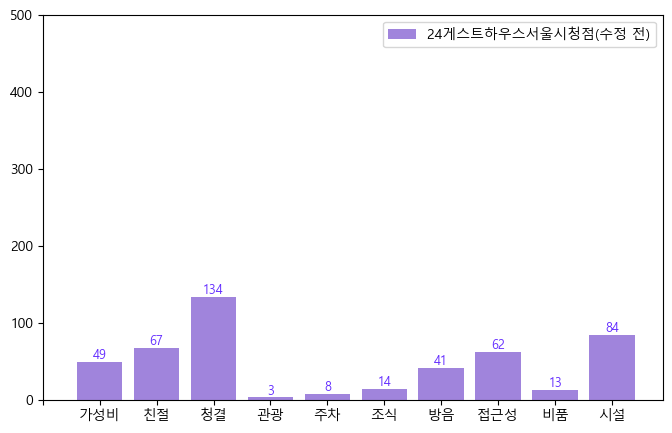

In [126]:
x = ['','가성비','친절','청결','관광','주차','조식','방음','접근성','비품','시설']

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.bar(w1.index,w1['cnt'],label='24게스트하우스서울시청점(수정 전)',color='#A084DC')
for i, v in enumerate(w1.index):
    plt.text(v, w1['cnt'][i+1],w1['cnt'][i+1],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='#642DFF',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
   
ax.legend()
plt.ylim([0,500])
# ax.set_xticklabels(x)
plt.xticks(range(len(x)),x)
plt.show()

------

In [15]:
c1 = pd.DataFrame(df[df['ht_id']==286].groupby('cat_id')['ht_id'].count()).rename(columns={'ht_id':'cnt'}) #코트야드메리어트서울타임스퀘어
c2 = pd.DataFrame(df[df['ht_id']==51].groupby('cat_id')['ht_id'].count()).rename(columns={'ht_id':'cnt'}) # 나인트리프리미어호텔인사동)
c3 = pd.DataFrame(df[df['ht_id']==357].groupby('cat_id')['ht_id'].count()).rename(columns={'ht_id':'cnt'}) # 호텔스카이파크킹스타운동대문점)

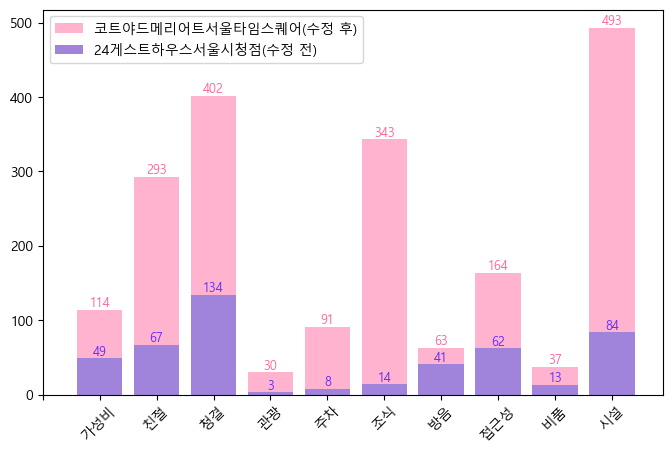

In [22]:
x = ['','가성비','친절','청결','관광','주차','조식','방음','접근성','비품','시설']


fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(c1.index,c1['cnt'],label='코트야드메리어트서울타임스퀘어(수정 후)',color='#FFB3CE')
for i, v in enumerate(c1.index):
    plt.text(v, c1['cnt'][i+1],c1['cnt'][i+1],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='#FF6699',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

ax.bar(w1.index,w1['cnt'],label='24게스트하우스서울시청점(수정 전)',color='#A084DC')
for i, v in enumerate(w1.index):
    plt.text(v, w1['cnt'][i+1],w1['cnt'][i+1],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='#642DFF',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
   
ax.legend()
# ax.set_xticklabels(x)
plt.xticks(range(len(x)),x,rotation=45)
plt.show()

In [25]:
ht_info[ht_info['ht_name'].str.contains('호텔스카이파크킹스')]

,ht_id,ht_name
356,357,호텔스카이파크킹스타운동대문점


In [4]:
## 만족지수
# def calculate_hotel_cat(df):
#     hotel_cat = pd.DataFrame(index=range(1, 387), columns=['ht_id']+['cat_id_'+str(i) for i in range(1, 12)])
#     hotel_cat['ht_id'] = range(1, 387)
#     hotel_cat = hotel_cat.fillna(0) # 초기값을 모두 0으로 설정

    
#     for h_id in hotel_cat['ht_id']:
#         for c_id in range(1, 12):
#             num_pos = len(df[(df['ht_id']==h_id) & (df['cat_id']==c_id) & (df['label']==1)])
#             num_neg = len(df[(df['ht_id']==h_id) & (df['cat_id']==c_id) & (df['label']==0)])
#             total = len(df[(df['ht_id']==h_id) & (df['cat_id']==c_id)])

#             try:
#                 pos_per = num_pos / total * 100
#                 neg_per = num_neg / total * 100
#                 cat_per = round(pos_per / (pos_per + neg_per) * 100, 2)
#                 if total <= 3:
#                     # cat_per = str(cat_per) + "(부족)"
#                     cat_per = np.nan
#             except ZeroDivisionError:
#                 cat_per = 'NaN'
                
#             hotel_cat.at[h_id, 'cat_id_'+str(c_id)] = cat_per

#     return hotel_cat

In [25]:
score1 = pd.read_csv('../web2/score1.csv')
score = pd.read_csv('../web2/score.csv')

In [3]:
score1

,ht_id,가성비,친절,청결,주변시설,주차,조식,방음,위치,비품,시설
0,1,75.9858,105.8420,170.8561,4.9180,2.1858,15.3005,14.2573,89.9117,7.7496,50.4918
1,2,4.3535,5.3901,5.8144,0.4728,0.0000,8.1250,0.5848,6.5603,0.2994,2.8161
2,3,0.5841,8.3562,10.5140,NaN,0.4673,3.6345,1.4019,3.2710,1.6822,8.7227
3,4,11.0467,16.8660,19.4900,0.3279,0.8431,0.2186,7.9895,9.5781,2.6995,12.1957
4,5,7.7135,20.6229,31.7672,0.5510,1.1019,1.6529,2.1799,5.7720,1.9534,10.5664
...,...,...,...,...,...,...,...,...,...,...,...
381,382,0.0818,0.0639,0.1230,NaN,0.0204,NaN,0.0153,0.0000,0.0000,0.0558
382,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,384,0.1124,0.4415,0.7307,NaN,0.0514,0.0000,0.0193,0.0289,0.0000,0.2743
384,385,2.3907,0.8197,5.9199,NaN,NaN,NaN,0.8197,0.4098,2.3053,4.0984


In [26]:
score

,ht_id,가성비,친절,청결,관광,주차,조식,방음,접근성,비품,시설
0,1,66.8978,53.3862,38.9684,24.1121,3.7218,19.6568,14.2828,53.0949,9.5212,13.2588
1,2,79.7346,56.5584,27.5881,48.2243,0.0000,217.1516,12.1874,80.5917,7.6536,15.3840
2,3,1.8041,14.7865,8.4127,NaN,2.7914,16.3807,4.9268,6.7765,7.2508,8.0356
3,4,97.2546,85.0711,44.4523,16.0748,14.3557,2.8081,80.0375,56.5606,33.1656,32.0250
4,5,40.4117,61.9010,43.1160,16.0748,11.1655,12.6365,12.9954,20.2833,14.2818,16.5115
...,...,...,...,...,...,...,...,...,...,...,...
381,382,15.3949,6.8906,5.9979,NaN,7.4437,NaN,3.2845,0.0000,0.0000,3.1308
382,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,384,8.4191,18.9430,14.1770,NaN,7.4437,0.0000,1.6423,1.4521,0.0000,6.1280
384,385,8.4191,1.6538,5.4007,NaN,NaN,NaN,3.2845,0.9681,11.3293,4.3048


In [117]:
dt1 = [374, 292, 72, 362, 282, 286, 246, 360, 289, 293, 130, 373, 288, 159, 287, 50, 313, 302, 221, 158]
dt2 = [374, 72, 282, 362, 246, 292, 50, 286, 328, 221, 289, 373, 158, 360, 288, 159, 287, 51, 313, 130]
len(dt1),len(dt2)

dt1 = dt1[:15]
dt2 = dt2[:15]

In [118]:
sc1 = score[score['ht_id'].isin(dt1)]
sc2 = score[score['ht_id'].isin(dt2)]

sc1_lst = np.round(sc1.iloc[:,1:].mean().values,2).tolist()
sc2_lst = np.round(sc2.iloc[:,1:].mean().values,2).tolist()

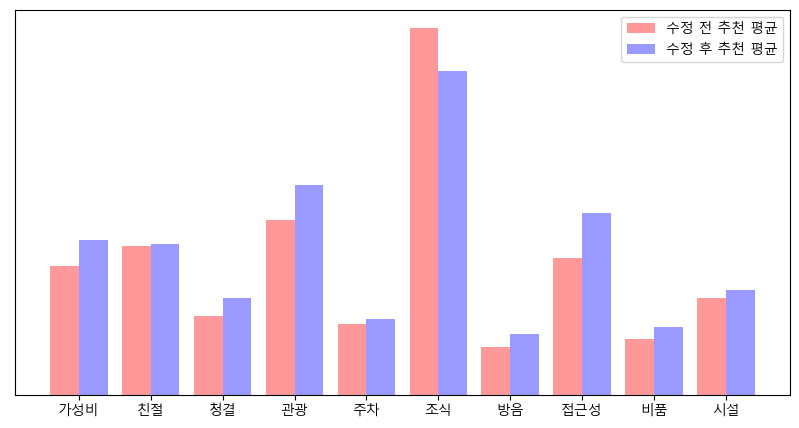

In [119]:

fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.4
x = ['가성비','친절','청결','관광','주차','조식','방음','접근성','비품','시설']

index = np.arange(10)

b1 = plt.bar(index,sc1_lst, bar_width, alpha=0.4, color='red', label='수정 전 추천 평균')
b2 = plt.bar(index + bar_width, sc2_lst, bar_width, alpha=0.4, color='blue', label='수정 후 추천 평균')

plt.xticks(index + bar_width/2, x)

plt.gca().axes.yaxis.set_visible(False)#y범위 없애기
plt.legend()
plt.show()

In [ ]:
# x = ['가성비','친절','청결','관광','주차','조식','방음','접근성','비품','시설']


# fig = plt.figure(figsize=(8, 5))
# ax = fig.add_subplot(1, 1, 1)
# ax.bar(x,sc2_lst,label='수정 후 추천 평균',color='#FFB3CE')
# ax.bar(x,sc1_lst,label='수정 전 추천 평균',color='#A084DC')
# ax.legend()
# # ax.set_xticklabels(x)
# plt.xticks(range(len(x)),x)
# plt.gca().axes.yaxis.set_visible(False)#y범위 없애기
# plt.show()